In [15]:
%matplotlib inline
import sys, os, time, gc, click, logging, pprint
from os.path import expanduser


In [21]:
%cd model/dentate

/home/igr/src/model/dentate


In [22]:
user_home = expanduser("~")
neuron_home = f'{user_home}/bin/nrnpython/lib/python'
model_home = f'{user_home}/src/model'
dentate_home = f'{model_home}/dentate' 
template_paths=f'{dentate_home}/templates'
config_prefix=f'{dentate_home}/config'
dataset_prefix='/media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG'

In [23]:
import yaml
# creates 1) a yaml with synaptic parameters that have been optimized for selectivity
# 2) yaml with the same set of parameters as 1) but structured weight scaling factor set to 0
# format is { population : { gid: parameter list }}
# where parameter has the format: 
# postsynaptic pop., presynaptic populations, section type, receptor type, mechanism parameter, value
#


optimize_selectivity_params = \
{'GC': { 505461: 
          [['GC', ['MC', 'ConMC'], 'apical', 'AMPA', ['weight', 'a'], 1.0020833],
           ['GC', ['MPP', 'LPP'], 'apical', 'AMPA', ['weight', 'a'], 7.5484376],
           ['GC', 'AAC', 'ais', 'GABA_A', 'weight', 0.40548438],
           ['GC', 'BC', ('soma', 'apical'), 'GABA_A', 'weight', 0.13261563],
           ['GC', 'HC', 'apical', 'GABA_A', 'weight', 0.6552531],
           ['GC', 'HCC', 'apical', 'GABA_A', 'weight', 0.8963594],
           ['GC', 'MOPP', 'apical', 'GABA_A', 'weight', 0.60100937],
           ['GC', 'NGFC', 'apical', 'GABA_A', 'weight', 0.6],
           ['GC', 'NGFC', 'apical', 'GABA_B', 'weight', 0.12395313]]}}    
    
    
no_structured_weights_selectivity_params = \
{'GC': { 505461: 
          [['GC', ['MC', 'ConMC'], 'apical', 'AMPA', ['weight', 'a'], 1.0020833],
           ['GC', ['MPP', 'LPP'], 'apical', 'AMPA', ['weight', 'a'], 0.0],
           ['GC', ['MPP', 'LPP'], 'apical', 'AMPA', ['weight', 'b'], 0.0],
           ['GC', 'AAC', 'ais', 'GABA_A', 'weight', 0.40548438],
           ['GC', 'BC', ('soma', 'apical'), 'GABA_A', 'weight', 0.13261563],
           ['GC', 'HC', 'apical', 'GABA_A', 'weight', 0.6552531],
           ['GC', 'HCC', 'apical', 'GABA_A', 'weight', 0.8963594],
           ['GC', 'MOPP', 'apical', 'GABA_A', 'weight', 0.60100937],
           ['GC', 'NGFC', 'apical', 'GABA_A', 'weight', 1.0],
           ['GC', 'NGFC', 'apical', 'GABA_B', 'weight', 0.12395313]]}}

with open('selectivity_params_GC_505461_20210405.yaml', 'w') as f:
    yaml.dump(optimize_selectivity_params, f)
with open('no_structured_weights_selectivity_params_GC_505461_20210405.yaml', 'w') as f:
    yaml.dump(no_structured_weights_selectivity_params, f)

### Simulation with structured weights and synaptic parameters optimized for selectivity

In [24]:
%run network_clamp.py go  -c Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_proximal_pf.yaml \
         -p GC -g 505461  -t 9500 --n-trials 2 \
         --template-paths templates:{user_home}/src/model/DGC/Mateos-Aparicio2014 \
         --dataset-prefix {dataset_prefix} \
         --input-features-path {dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
         --input-features-namespaces 'Place Selectivity' \
         --input-features-namespaces 'Grid Selectivity' \
         --input-features-namespaces 'Constant Selectivity' \
         --arena-id A --trajectory-id Diag  \
         --recording-profile 'Network clamp default' \
         --use-coreneuron \
         --config-prefix config  --results-path results/netclamp \
         --results-file-id "demo" \
         --params-path selectivity_params_GC_505461_20210405.yaml

INFO:dentate:env.dataset_prefix = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG
INFO:dentate:env.cell_selection_path = None
INFO:dentate:env.data_file_path = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_proximal_pf_20210114.h5
INFO:dentate:population_names = ['GC', 'MC']
INFO:dentate:population_ranges = {'GC': (0, 1000000), 'MC': (1000000, 30000), 'HC': (1030000, 9000), 'BC': (1039000, 3800), 'AAC': (1042800, 450), 'HCC': (1043250, 1400), 'NGFC': (1044650, 5000), 'IS': (1049650, 3000), 'MOPP': (1052650, 4000), 'MPP': (1056650, 38000), 'LPP': (1094650, 34000), 'CA3c': (1128650, 67000), 'ConMC': (1195650, 30000)}
INFO:dentate:attribute info: {'GC': {'LTD Structured Weights A': ['AMPA', 'syn_id'], 'LTP Structured Weights A': ['AMPA', 'syn_id'], 'Log-Normal Weights': ['AMPA', 'syn_id'], 'Normal Weights': ['AMPA', 'syn_id'], 'Synapse Attributes': ['swc_types', 'syn_ids', 'syn_layers', 'syn_locs', 'syn_secs', 'syn_types'], 'Tree

INFO:dentate.cells:init_nseg: changed DGC[1].sections[22].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 0: 1.319
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 1: 1.309
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 2: 1.322
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 3: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 4: 1.419
INFO:dentate.cells:init_nseg: changed DGC[1].sections[26].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 0: 1.399
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 1: 1.459
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 2: 1.393
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 3: 1.341
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 4: 1.332
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 se

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 3: 1.404
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 4: 1.344
INFO:dentate.cells:init_nseg: changed DGC[1].sections[16].nseg 5 --> 7
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 0: 1.327
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 1: 1.278
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 2: 1.455
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 3: 1.580
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 4: 1.453
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 5: 1.328
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 6: 1.429
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 7: 1.382
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 8: 1.456
INFO:dentate.cells:init_nseg: changed DGC[1].sections[14].ns

INFO:dentate.cells:init_nseg: changed DGC[1].sections[3].nseg 15 --> 17
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical0 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical18 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 1: 1.068
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 2: 1.268
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 3: 1.238
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 4: 1.406
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 0: 1.319
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 1: 1.309
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 2: 1.322
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 3: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; api

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 1: 1.421
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 2: 1.408
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 3: 1.393
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 4: 1.318
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 5: 1.372
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical17 seg 6: 1.366
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 0: 1.401
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 1: 1.343
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 2: 1.388
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 3: 1.473
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 4: 1.464
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 5: 1.356
INFO:dentate.cells:cm_correction_factor for gid: 505

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 8: 1.304
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 9: 1.338
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 10: 1.472
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 11: 1.426
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 12: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 13: 1.429
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 14: 1.401
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 15: 1.598
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical3 seg 16: 1.629
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical0 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical18 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical22 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for

INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical13 seg 6: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 0: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 1: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 2: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 3: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 5: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 7: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical15 seg 8: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical17 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical17 seg 1: 1.000
INFO:dentate.cel

INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 1: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 2: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 5: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical5 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical3 seg 0: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical3 seg 1: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical3 seg 2: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical3 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical3 seg 4: 1.000
INFO:dentate.cells:g_pas_cor

INFO:dentate.cells:node: apical11, L: 105.3, diams: [0.80, 0.73, 0.73, 0.72, 0.71, 0.71, 0.70, 0.69, 0.68, 0.67, 0.66, 0.65, 0.65, 0.64, 0.63, 0.63, 0.62, 0.62, 0.62, 0.61, 0.61, 0.60], children: 0, exc_syns: 226, inh_syns: 72, parent: apical10; connection_loc: 1.0
INFO:dentate.cells:node: apical9, L: 222.6, diams: [0.95, 0.94, 0.93, 0.92, 0.91, 0.90, 0.89, 0.88, 0.86, 0.86, 0.84, 0.84, 0.83, 0.82, 0.81, 0.80, 0.80, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.72, 0.71, 0.70, 0.70, 0.69, 0.69, 0.68, 0.67, 0.67, 0.66, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.62, 0.62, 0.61, 0.61, 0.60], children: 0, exc_syns: 420, inh_syns: 135, parent: apical8; connection_loc: 1.0
INFO:dentate.cells:node: apical2, L: 87.8, diams: [3.59, 3.05, 2.65, 2.61, 1.29, 1.27, 1.25, 1.24, 1.22, 1.21, 1.19, 1.18, 1.16, 1.15, 1.13, 1.11, 1.09], children: 2, exc_syns: 124, inh_syns: 49, parent: apical1; connection_loc: 1.0
INFO:dentate.cells:node: apical4, L: 164.0, diams: [1.09, 1.06, 1.04, 1.03, 1.01, 0.99, 0.98

DGC[1].sections[0] { nseg=1  L=10.6159  Ra=150
	DGC[1].sections[29] connect DGC[1].sections[0] (0), 1
	/* First segment only */
	insert morphology { diam=5.62011}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0175399 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=1.08015e-06 e_pas=-74.5513}
	insert SatExp2Syn { sat=0.9 dur_onset=0.5 tau_offset=9 e=-75}
}
DGC[1].sections[1] { nseg=1  L=9.79351  Ra=150
	DGC[1].sections[0] connect DGC[1].sections[1] (0), 1
	/* First segment only */
	insert morphology { diam=4.13475}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0245232 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=3.15533e-06 e_pas=-74.5513}
	insert SatExp2Syn

INFO:__main__:*** Running simulation with dt = 0.025 and tstop = 19500.00
INFO:__main__:*** Parameters: {'GC': {505461: [(SynParam(population='GC', source=['MC', 'ConMC'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  1.0020833),
                 (SynParam(population='GC', source=['MPP', 'LPP'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  7.5484376),
                 (SynParam(population='GC', source='AAC', sec_type='ais', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.40548438),
                 (SynParam(population='GC', source='BC', sec_type=('soma', 'apical'), syn_name='GABA_A', param_path='weight', param_range=None),
                  0.13261563),
                 (SynParam(population='GC', source='HC', sec_type='apical', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.6552531),
                 (SynParam(pop

INFO:dentate.statedata:Querying state data...
INFO:dentate.spikedata:Reading spike data for population ConMC in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population ConMC...
INFO:dentate.spikedata: Read 7437 spikes and 2 trials for population ConMC
INFO:dentate.spikedata:Reading spike data for population LPP in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population LPP...
INFO:dentate.spikedata: Read 13300 spikes and 2 trials for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MPP...
INFO:dentate.spikedata: Read 25007 spikes and 2 trials for population MPP
INFO:dentate.spikedata:Reading spike data for population MC in time range [0.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MC...
INFO:dentate.spikedata: Read 6857 spikes and 2 trials for population MC
I

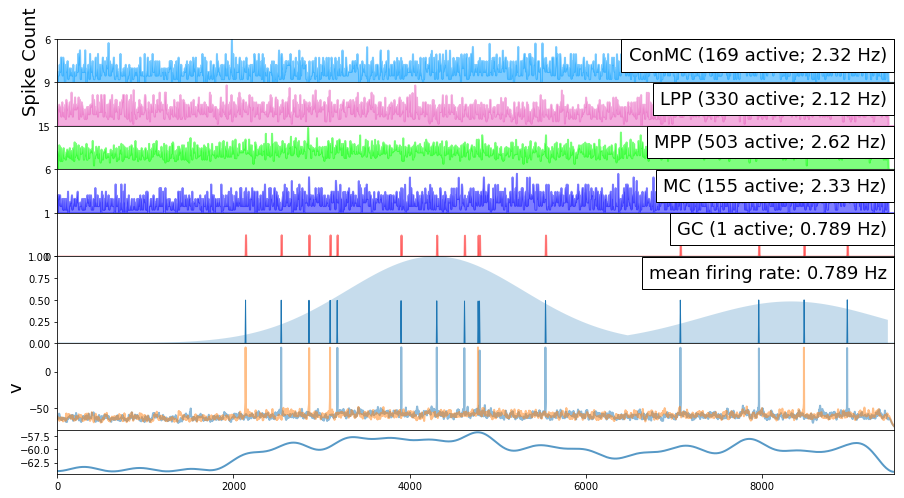

In [25]:
%run scripts/plot_network_clamp.py -v -g 505461 --t-max=9500. \
-p results/netclamp/Single_GC_Exc_Sat_SLN_IN_Izh_proximal_pf_results_demo_selectivity_params_GC_505461_20210405.h5 \
--state-variable v --lowpass-plot-type=subplot \
-i MPP -i LPP -i MC -i ConMC -i GC \
--target-input-features-path={dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
--target-input-features-namespace 'Place Selectivity' \
--config-file Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_proximal_pf.yaml \
--target-input-features-arena-id=A \
--target-input-features-trajectory-id=Diag \
--font-size 18 \
--line-width 2


### Simulation without structured weights and synaptic paramters optimized for selectivity

In [8]:
%run network_clamp.py go  -c Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_proximal_pf.yaml \
         -p GC -g 505461  -t 9500 --n-trials 2 \
         --template-paths templates:{user_home}/src/model/DGC/Mateos-Aparicio2014 \
         --dataset-prefix {dataset_prefix} \
         --input-features-path {dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
         --input-features-namespaces 'Place Selectivity' \
         --input-features-namespaces 'Grid Selectivity' \
         --input-features-namespaces 'Constant Selectivity' \
         --arena-id A --trajectory-id Diag  \
         --recording-profile 'Network clamp default' \
         --use-coreneuron \
         --config-prefix config  --results-path results/netclamp \
         --results-file-id "demo" \
         --params-path no_structured_weights_selectivity_params_GC_505461_20210405.yaml

INFO:dentate:env.dataset_prefix = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG
INFO:dentate:env.cell_selection_path = None
INFO:dentate:env.data_file_path = /media/igr/d865f900-7fcd-45c7-a7a7-bd2a7391bc40/Data/DG/Slice/dentatenet_Full_Scale_GC_Exc_Sat_SLN_proximal_pf_20210114.h5
INFO:dentate:population_names = ['GC', 'MC']
INFO:dentate:population_ranges = {'GC': (0, 1000000), 'MC': (1000000, 30000), 'HC': (1030000, 9000), 'BC': (1039000, 3800), 'AAC': (1042800, 450), 'HCC': (1043250, 1400), 'NGFC': (1044650, 5000), 'IS': (1049650, 3000), 'MOPP': (1052650, 4000), 'MPP': (1056650, 38000), 'LPP': (1094650, 34000), 'CA3c': (1128650, 67000), 'ConMC': (1195650, 30000)}
INFO:dentate:attribute info: {'GC': {'LTD Structured Weights A': ['AMPA', 'syn_id'], 'LTP Structured Weights A': ['AMPA', 'syn_id'], 'Log-Normal Weights': ['AMPA', 'syn_id'], 'Normal Weights': ['AMPA', 'syn_id'], 'Synapse Attributes': ['swc_types', 'syn_ids', 'syn_layers', 'syn_locs', 'syn_secs', 'syn_types'], 'Tree

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical22 seg 4: 1.406
INFO:dentate.cells:init_nseg: changed DGC[0].sections[22].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 0: 1.319
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 1: 1.309
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 2: 1.322
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 3: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical26 seg 4: 1.419
INFO:dentate.cells:init_nseg: changed DGC[0].sections[26].nseg 5 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 0: 1.399
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 1: 1.459
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 2: 1.393
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 seg 3: 1.341
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical28 se

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 2: 1.460
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 3: 1.404
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical16 seg 4: 1.344
INFO:dentate.cells:init_nseg: changed DGC[0].sections[16].nseg 5 --> 7
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 0: 1.327
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 1: 1.278
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 2: 1.455
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 3: 1.580
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 4: 1.453
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 5: 1.328
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 6: 1.429
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical14 seg 7: 1.382
INFO:dentate.cells:cm_correction_factor for gid: 505461; api

	1 
	1 


INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 12: 1.514
INFO:dentate.cells:init_nseg: changed DGC[0].sections[9].nseg 13 --> 15
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical2 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical2 seg 1: 1.236
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical2 seg 2: 1.299
INFO:dentate.cells:init_nseg: changed DGC[0].sections[2].nseg 3 --> 5
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 0: 1.241
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 1: 1.392
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 2: 1.274
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 3: 1.324
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 4: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 5: 1.445
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical4 seg 6: 1.321

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical19 seg 4: 1.248
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 0: 1.343
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 1: 1.368
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 2: 1.224
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 3: 1.311
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 4: 1.242
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 5: 1.432
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 6: 1.449
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 7: 1.427
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 8: 1.389
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 9: 1.541
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical21 seg 10: 1.430
INFO:dentate.cells:cm_correction_factor for gid: 50

INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 4: 1.345
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 5: 1.344
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 6: 1.343
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 7: 1.327
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 8: 1.323
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 9: 1.565
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 10: 1.477
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 11: 1.475
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 12: 1.378
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 13: 1.533
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical9 seg 14: 1.446
INFO:dentate.cells:cm_correction_factor for gid: 505461; apical2 seg 0: 1.000
INFO:dentate.cells:cm_correction_factor for gid: 505461; ap

INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 5: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 7: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical24 seg 8: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical19 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical19 seg 1: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical19 seg 2: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical19 seg 3: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical19 seg 4: 1.001
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical21 seg 0: 1.001
INFO:dentate.cel

INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical12 seg 10: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical12 seg 11: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical12 seg 12: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 1: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 2: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 3: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 4: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 5: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical11 seg 6: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical9 seg 0: 1.000
INFO:dentate.cells:g_pas_correction_factor for gid: 505461; apical9 seg 1: 1.000
INFO:dentate.ce

INFO:dentate.cells:node: apical19, L: 117.6, diams: [3.40, 3.04, 2.74, 2.61, 2.58, 2.55, 1.26, 1.24, 1.22, 1.21, 1.19, 1.17, 1.15, 1.13, 1.12, 1.10, 1.09, 1.07, 1.06, 1.05, 1.04, 1.02, 1.01, 0.99, 0.99], children: 2, exc_syns: 145, inh_syns: 78, parent: apical18; connection_loc: 1.0
INFO:dentate.cells:node: apical21, L: 203.4, diams: [0.99, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.90, 0.89, 0.88, 0.86, 0.85, 0.84, 0.83, 0.81, 0.80, 0.80, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.72, 0.71, 0.70, 0.69, 0.68, 0.68, 0.67, 0.67, 0.66, 0.65, 0.65, 0.64, 0.63, 0.63, 0.62, 0.62], children: 0, exc_syns: 389, inh_syns: 166, parent: apical19; connection_loc: 1.0
INFO:dentate.cells:node: apical20, L: 202.2, diams: [0.99, 0.97, 0.96, 0.95, 0.93, 0.92, 0.91, 0.89, 0.88, 0.87, 0.86, 0.84, 0.84, 0.82, 0.81, 0.80, 0.79, 0.78, 0.77, 0.77, 0.75, 0.75, 0.74, 0.73, 0.72, 0.71, 0.71, 0.70, 0.69, 0.68, 0.67, 0.67, 0.66, 0.65, 0.65, 0.64, 0.63, 0.63, 0.62, 0.62], children: 0, exc_syns: 414, inh_syns: 143, pare

INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:__main__:generating spike trains in time range [0.0, 9500.0] for 937 inputs from presynaptic population MPP...
INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:__main__:generating spike trains in time range [0.0, 9500.0] for 153 inputs from presynaptic population NGFC...
INFO:__main__:reading input features namespace Place Selectivity A...
INFO:__main__:reading input features namespace Grid Selectivity A...
INFO:__main__:reading input features namespace Constant Selectivity A...
INFO:dentate.synapses:insert_biophys_cell_syns: source: MC target: GC cell 505461: created 1138 mechanisms and 1138 netcons for 569

DGC[0].sections[0] { nseg=1  L=10.6159  Ra=150
	DGC[0].sections[29] connect DGC[0].sections[0] (0), 1
	/* First segment only */
	insert morphology { diam=5.62011}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0175399 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=1.08015e-06 e_pas=-74.5513}
	insert SatExp2Syn { sat=0.9 dur_onset=0.5 tau_offset=9 e=-75}
}
DGC[0].sections[1] { nseg=1  L=9.79351  Ra=150
	DGC[0].sections[0] connect DGC[0].sections[1] (0), 1
	/* First segment only */
	insert morphology { diam=4.13475}
	insert capacitance { cm=1}
	insert kap { gkabar_kap=0.0245232 vhalfn_kap=11 vhalfl_kap=-56}
	insert kdr { gkdrbar_kdr=0.00736602}
	insert k_ion { ek=-80}
	insert nas { sh_nas=7.01902 sha_nas=0 gbar_nas=0.0169442 ar_nas=1}
	insert na_ion { ena=50}
	insert pas { g_pas=3.15533e-06 e_pas=-74.5513}
	insert SatExp2Syn

INFO:__main__:*** Running simulation with dt = 0.025 and tstop = 19500.00
INFO:__main__:*** Parameters: {'GC': {505461: [(SynParam(population='GC', source=['MC', 'ConMC'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  1.0020833),
                 (SynParam(population='GC', source=['MPP', 'LPP'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'a'], param_range=None),
                  0.0),
                 (SynParam(population='GC', source=['MPP', 'LPP'], sec_type='apical', syn_name='AMPA', param_path=['weight', 'b'], param_range=None),
                  0.0),
                 (SynParam(population='GC', source='AAC', sec_type='ais', syn_name='GABA_A', param_path='weight', param_range=None),
                  0.40548438),
                 (SynParam(population='GC', source='BC', sec_type=('soma', 'apical'), syn_name='GABA_A', param_path='weight', param_range=None),
                  0.13261563),
                 (SynParam(

INFO:dentate.statedata:Querying state data...
INFO:dentate.spikedata:Reading spike data for population ConMC in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population ConMC...
INFO:dentate.spikedata: Read 7517 spikes and 2 trials for population ConMC
INFO:dentate.spikedata:Reading spike data for population LPP in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population LPP...
INFO:dentate.spikedata: Read 13485 spikes and 2 trials for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MPP...
INFO:dentate.spikedata: Read 25325 spikes and 2 trials for population MPP
INFO:dentate.spikedata:Reading spike data for population MC in time range [-250.0, 9500.0]...
INFO:dentate.spikedata:Read spike cell attributes for population MC...
INFO:dentate.spikedata: Read 6948 spikes and 2 trials for pop

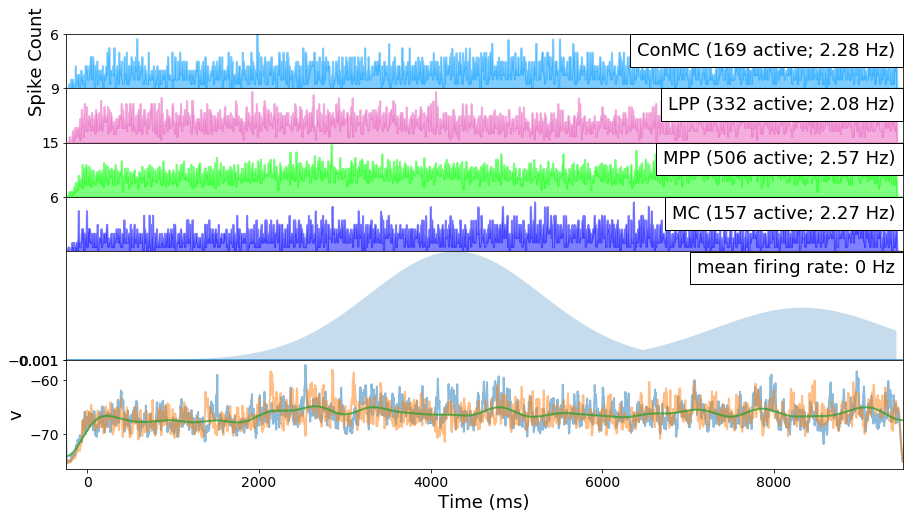

In [9]:
%run scripts/plot_network_clamp.py -v -g 505461 --t-min -250 --t-max=9500. \
-p results/netclamp/Single_GC_Exc_Sat_SLN_IN_Izh_proximal_pf_results_demo_no_structured_weights_selectivity_params_GC_505461_20210405.h5 \
--state-variable v --lowpass-plot-type=subplot \
-i MPP -i LPP -i MC -i ConMC -i GC \
--target-input-features-path={dataset_prefix}/Full_Scale_Control/DG_input_features_20200910_compressed.h5 \
--target-input-features-namespace 'Place Selectivity' \
--config-file Network_Clamp_GC_Exc_Sat_SLN_IN_Izh_extent.yaml \
--target-input-features-arena-id=A \
--target-input-features-trajectory-id=Diag \
--lowpass-plot-type=overlay \
--font-size 18 \
--line-width 2
